# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [35]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [ ]:
# for local
# env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

# LOCAL - select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='Reacher_Linux_NoVis/Reacher.x86_64')

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
print('States size: {}'.format(states.shape))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

# MULTI AGENT

In [5]:
import torch
import numpy as np
from ddpg_agent import Agent

from collections import deque

# Create simulation environment
env_info = env.reset(train_mode=True)[brain_name]

# Initialize Feed-forward DNNs for Actor and Critic models. 
agent = Agent(state_size=env_info.vector_observations.shape[1],
              action_size=brain.vector_action_space_size,
              random_seed=0)

!pip install progressbar
import progressbar as pb
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]


def ddpg():
    timer = pb.ProgressBar(widgets=widget, maxval=1000).start()
    # Set the number of episodes to run the simulation
    episodes = 1000 # 10000
    maxlen=1000
    scores_deque = deque(maxlen=100)
    all_scores = []

    for episode in range(1,episodes): 
        # Reset the enviroment
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        cur_states = env_info.vector_observations  
        scores = np.zeros(num_agents)
        agent.reset()
        for i in range(maxlen):

            # Predict the best action for the current state for all agents.
            actions = agent.act(cur_states, add_noise = True)

            # Action is performed and new state, reward, info are received. 
            env_info = env.step(actions)[brain_name]          # send all actions to the environment

            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)

            # current state, action, reward, new state are stored in the experience replay
            for i in range(num_agents):
                agent.step(cur_states[i], actions[i], rewards[i], next_states[i], dones[i])

            # roll over new state
            cur_states = next_states
            
            if np.any(dones):
                break

        all_scores.append(scores)
        score = np.mean(scores)
        scores_deque.append(score)

        print("Episode:{}, Average Running, 100-Episode Length Score:{:.2f}".format(episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=30.0: # WANT AN AVERAGE SCORE TO BE > 30
            print('\nEnvironment solved in {:d} episodes!\tAverage 100-Episode Length Score: {:.2f}'.format(episode-100, np.mean(scores_deque)))
            torch.save(agent.actor_target.state_dict(), 'actor_checkpoint.pth')
            torch.save(agent.critic_target.state_dict(), 'critic_checkpoint.pth')
            break
            
        # update progress widget bar
        timer.update(episode+1)
    timer.finish()
    return all_scores

## LOCAL

In [6]:
all_scores = ddpg()
import pickle    
with open('all_scores.pkl', 'wb') as f:
    pickle.dump(all_scores, f)

Episode:1, Average Running, 100-Episode Length Score:0.43


Episode:2, Average Running, 100-Episode Length Score:0.99


Episode:3, Average Running, 100-Episode Length Score:1.25


Episode:4, Average Running, 100-Episode Length Score:1.53


Episode:5, Average Running, 100-Episode Length Score:1.70


Episode:6, Average Running, 100-Episode Length Score:1.96


Episode:7, Average Running, 100-Episode Length Score:2.18


Episode:8, Average Running, 100-Episode Length Score:2.33


Episode:9, Average Running, 100-Episode Length Score:2.65


Episode:10, Average Running, 100-Episode Length Score:2.83


Episode:11, Average Running, 100-Episode Length Score:2.96


Episode:12, Average Running, 100-Episode Length Score:3.07


Episode:13, Average Running, 100-Episode Length Score:3.30


Episode:14, Average Running, 100-Episode Length Score:3.51


Episode:15, Average Running, 100-Episode Length Score:3.68


Episode:16, Average Running, 100-Episode Length Score:3.92


Episode:17, Average Running, 100-Episode Length Score:4.07


Episode:18, Average Running, 100-Episode Length Score:4.21


Episode:19, Average Running, 100-Episode Length Score:4.39


Episode:20, Average Running, 100-Episode Length Score:4.72


Episode:21, Average Running, 100-Episode Length Score:4.96


Episode:22, Average Running, 100-Episode Length Score:5.24


Episode:23, Average Running, 100-Episode Length Score:5.73


Episode:24, Average Running, 100-Episode Length Score:6.13


Episode:25, Average Running, 100-Episode Length Score:6.56


Episode:26, Average Running, 100-Episode Length Score:7.13


Episode:27, Average Running, 100-Episode Length Score:7.69


Episode:28, Average Running, 100-Episode Length Score:8.30


Episode:29, Average Running, 100-Episode Length Score:9.04


Episode:30, Average Running, 100-Episode Length Score:9.72


Episode:31, Average Running, 100-Episode Length Score:10.39


Episode:32, Average Running, 100-Episode Length Score:11.04


Episode:33, Average Running, 100-Episode Length Score:11.72


Episode:34, Average Running, 100-Episode Length Score:12.40


Episode:35, Average Running, 100-Episode Length Score:13.07


Episode:36, Average Running, 100-Episode Length Score:13.74


Episode:37, Average Running, 100-Episode Length Score:14.40


Episode:38, Average Running, 100-Episode Length Score:14.95


Episode:39, Average Running, 100-Episode Length Score:15.50


Episode:40, Average Running, 100-Episode Length Score:16.03


Episode:41, Average Running, 100-Episode Length Score:16.54


Episode:42, Average Running, 100-Episode Length Score:17.02


Episode:43, Average Running, 100-Episode Length Score:17.49


Episode:44, Average Running, 100-Episode Length Score:17.92


Episode:45, Average Running, 100-Episode Length Score:18.34


Episode:46, Average Running, 100-Episode Length Score:18.72


Episode:47, Average Running, 100-Episode Length Score:19.06


Episode:48, Average Running, 100-Episode Length Score:19.42


Episode:49, Average Running, 100-Episode Length Score:19.73


Episode:50, Average Running, 100-Episode Length Score:20.05


Episode:51, Average Running, 100-Episode Length Score:20.35


Episode:52, Average Running, 100-Episode Length Score:20.67


Episode:53, Average Running, 100-Episode Length Score:20.96


Episode:54, Average Running, 100-Episode Length Score:21.24


Episode:55, Average Running, 100-Episode Length Score:21.53


Episode:56, Average Running, 100-Episode Length Score:21.81


Episode:57, Average Running, 100-Episode Length Score:22.09


Episode:58, Average Running, 100-Episode Length Score:22.35


Episode:59, Average Running, 100-Episode Length Score:22.60


Episode:60, Average Running, 100-Episode Length Score:22.83


Episode:61, Average Running, 100-Episode Length Score:23.06


Episode:62, Average Running, 100-Episode Length Score:23.31


Episode:63, Average Running, 100-Episode Length Score:23.53


Episode:64, Average Running, 100-Episode Length Score:23.73


Episode:65, Average Running, 100-Episode Length Score:23.95


Episode:66, Average Running, 100-Episode Length Score:24.16


Episode:67, Average Running, 100-Episode Length Score:24.36


Episode:68, Average Running, 100-Episode Length Score:24.57


Episode:69, Average Running, 100-Episode Length Score:24.76


Episode:70, Average Running, 100-Episode Length Score:24.96


Episode:71, Average Running, 100-Episode Length Score:25.14


Episode:72, Average Running, 100-Episode Length Score:25.30


Episode:73, Average Running, 100-Episode Length Score:25.43


Episode:74, Average Running, 100-Episode Length Score:25.57


Episode:75, Average Running, 100-Episode Length Score:25.69


Episode:76, Average Running, 100-Episode Length Score:25.80


Episode:77, Average Running, 100-Episode Length Score:25.94


Episode:78, Average Running, 100-Episode Length Score:26.07


Episode:79, Average Running, 100-Episode Length Score:26.22


Episode:80, Average Running, 100-Episode Length Score:26.36


Episode:81, Average Running, 100-Episode Length Score:26.48


Episode:82, Average Running, 100-Episode Length Score:26.60


Episode:83, Average Running, 100-Episode Length Score:26.72


Episode:84, Average Running, 100-Episode Length Score:26.84


Episode:85, Average Running, 100-Episode Length Score:26.94


Episode:86, Average Running, 100-Episode Length Score:27.04


Episode:87, Average Running, 100-Episode Length Score:27.14


Episode:88, Average Running, 100-Episode Length Score:27.25


Episode:89, Average Running, 100-Episode Length Score:27.37


Episode:90, Average Running, 100-Episode Length Score:27.46


Episode:91, Average Running, 100-Episode Length Score:27.55


Episode:92, Average Running, 100-Episode Length Score:27.65


Episode:93, Average Running, 100-Episode Length Score:27.74


Episode:94, Average Running, 100-Episode Length Score:27.81


Episode:95, Average Running, 100-Episode Length Score:27.89


Episode:96, Average Running, 100-Episode Length Score:27.99


Episode:97, Average Running, 100-Episode Length Score:28.09


Episode:98, Average Running, 100-Episode Length Score:28.19


Episode:99, Average Running, 100-Episode Length Score:28.27


Episode:100, Average Running, 100-Episode Length Score:28.34


Episode:101, Average Running, 100-Episode Length Score:28.60


Episode:102, Average Running, 100-Episode Length Score:28.95


Episode:103, Average Running, 100-Episode Length Score:29.31


Episode:104, Average Running, 100-Episode Length Score:29.66


Episode:105, Average Running, 100-Episode Length Score:30.00


Episode:106, Average Running, 100-Episode Length Score:30.30

Environment solved in 6 episodes!	Average 100-Episode Length Score: 30.30


NameError: name 'pickle' is not defined

In [7]:
import pickle
with open('all_scores.pkl', 'wb') as f:
    pickle.dump(all_scores, f)

# PLOT

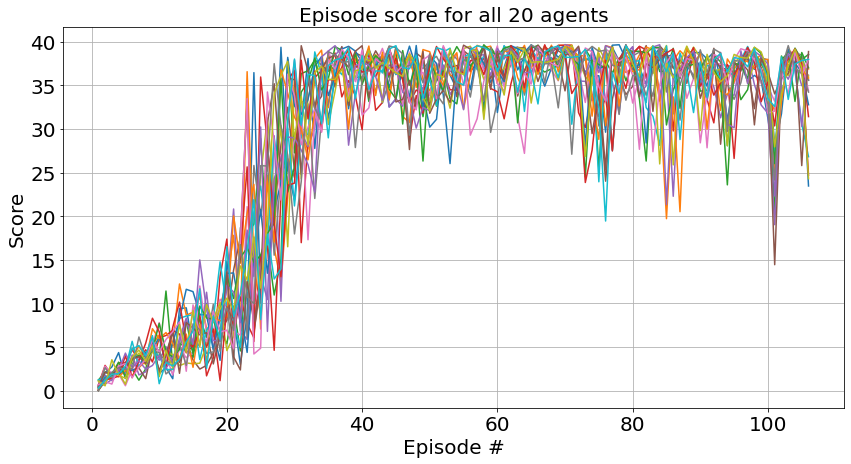

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(all_scores)+1), all_scores)
plt.ylabel('Score', fontsize=20)
plt.xlabel('Episode #',fontsize=20)
plt.title("Episode score for all 20 agents", fontsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.grid()
plt.show()


In [32]:
# load the weights from file
from ddpg_agent import Agent
import torch
agent = Agent(state_size=env_info.vector_observations.shape[1],
              action_size=brain.vector_action_space_size,
              random_seed=0)
agent.actor_local.load_state_dict(torch.load('actor_checkpoint.pth'))
agent.critic_local.load_state_dict(torch.load('critic_checkpoint.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
states = env_info.vector_observations              # get the current states
scores = np.zeros(num_agents)                      # initialize the score
while True:
    actions =   agent.act(states, add_noise=True)  # select an action
    env_info = env.step(actions)[brain_name]       # send the action to the environment
    next_states = env_info.vector_observations     # get the next state
    rewards = env_info.rewards                     # get the reward
    dones = env_info.local_done                    # see if episode has finished
    scores += rewards                              # update the score
    states = next_states                           # roll over the state to next time step
    if np.any(dones):                              # exit loop if episode finished
        break
    
print("Score: {}".format(np.mean(scores)))

Score: 19.777999557927252


In [33]:
env.close()